In [ ]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
import skgstat as skg

In [74]:
# Baca file CSV (pastikan kolom: x, y, nilai)
df = pd.read_csv('earthquake_data.csv')

# Ambil koordinat dan nilai
coords = df[['Epicenter Longitude', 'Epicenter Latitude']].to_numpy()
vals = df[['Magnitude']].to_numpy()
print(df.get('sample'))
# make a nice table
pd.DataFrame({'x': coords[:, 0], 'y': coords[:, 1], 'lead': vals.flatten()}).head()

None


,x,y,lead
0,29.080456,62.502584,5.498160
1,9.709794,-0.986932,7.802857
2,-53.626698,-54.816190,6.927976
3,-2.443443,42.595522,6.394634
4,120.610674,-70.692248,4.232334


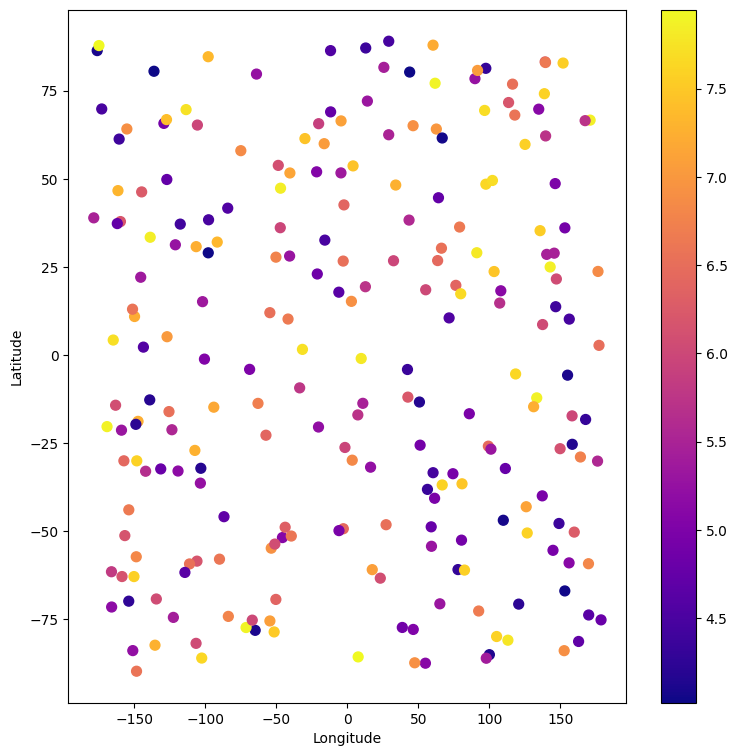

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
art = ax.scatter(coords[:, 0], coords[:, 1], s=50, c=vals.flatten(), cmap='plasma')
plt.colorbar(art)
plt.xlabel('Longitude')
plt.ylabel('Latitude')  
plt.show()

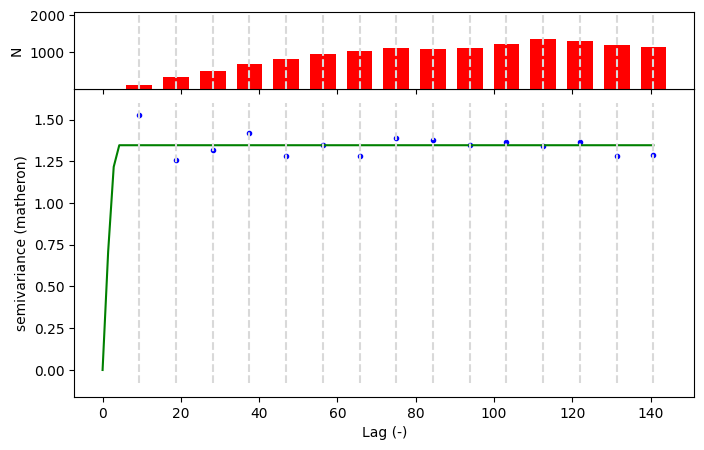

In [77]:
V = skg.Variogram(coords, vals.flatten(), maxlag='median', n_lags=15, normalize=False)
fig = V.plot(show=False)

In [80]:
print('Sample variance: %.2f   Variogram sill: %.2f' % (vals.flatten().var(), V.describe()['sill']))

Sample variance: 1.37   Variogram sill: 1.35


In [81]:
pprint(V.describe())

{'dist_func': 'euclidean',
 'effective_range': 3.8687829308311823,
 'estimator': 'matheron',
 'kwargs': {},
 'model': 'spherical',
 'normalized_effective_range': 544.4103370724281,
 'normalized_nugget': 0,
 'normalized_sill': 2.0516746045198233,
 'nugget': 0,
 'params': {'bin_func': 'even',
            'dist_func': 'euclidean',
            'estimator': 'matheron',
            'fit_method': 'trf',
            'fit_sigma': None,
            'maxlag': 140.71876008702952,
            'model': 'spherical',
            'n_lags': 15,
            'normalize': False,
            'use_nugget': False,
            'verbose': False},
 'sill': 1.345984836574268}


In [82]:
print(V)

spherical Variogram
-------------------
Estimator:         matheron
Effective Range:   3.87
Sill:              1.35
Nugget:            0.00
        


In [83]:
ok = skg.OrdinaryKriging(V, min_points=5, max_points=15, mode='exact')

In [84]:
# build the target grid
x = coords[:, 0]
y = coords[:, 1]
xx, yy = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

In [85]:
print(np.isnan(field).all(), np.isnan(s2).all())
print(np.min(field), np.max(field))


True True
nan nan


In [86]:
print("Field range:", field.min(), field.max())
print("S2 range:", s2.min(), s2.max())


Field range: nan nan
S2 range: nan nan


In [30]:
print("Field all NaN:", np.isnan(field).all())
print("S2 all NaN:", np.isnan(s2).all())


Field all NaN: False
S2 all NaN: False


In [33]:
print("Field all NaN:", np.isnan(field).all())


Field all NaN: False


In [71]:
print("Field range:", np.nanmin(field), np.nanmax(field))
print("S2 range:", np.nanmin(s2), np.nanmax(s2))


Field range: nan nan
S2 range: nan nan


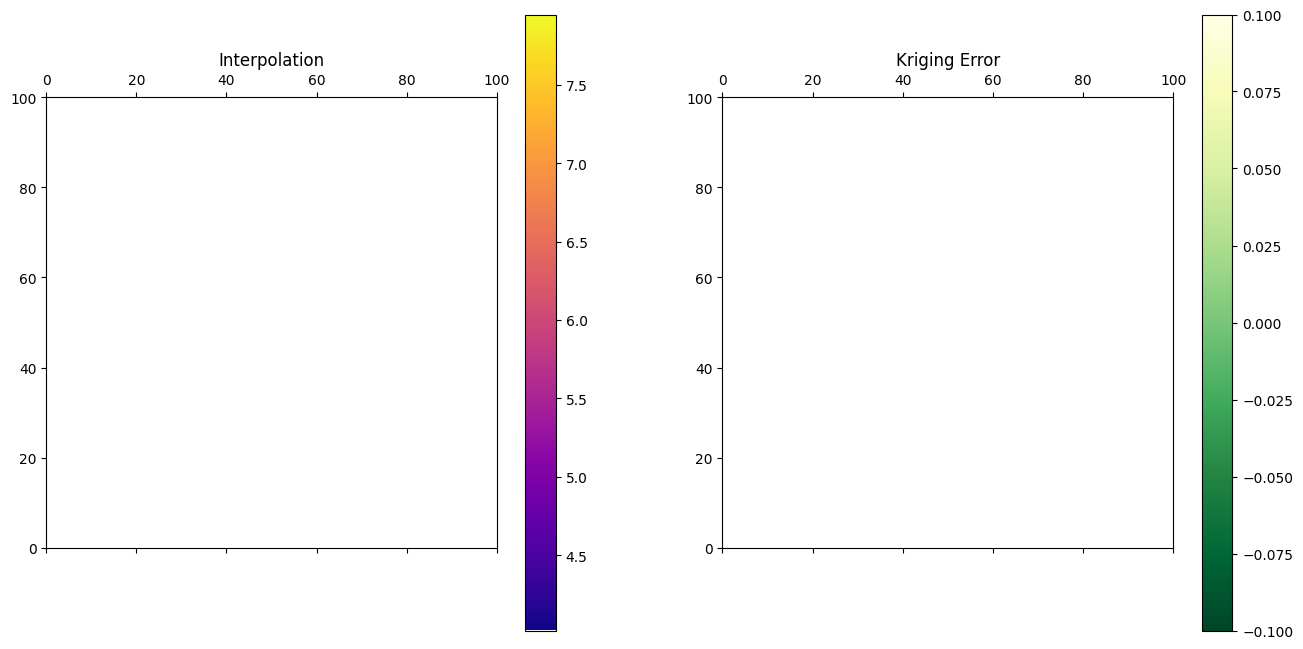

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

x_ = (x - x.mean()) / x.std() * 15 + 50
y_ = (y - y.mean()) / y.std() * 15 + 50

art = axes[0].matshow(field.T, origin='lower', cmap='plasma', vmin=vals.min(), vmax=vals.max())
axes[0].set_title('Interpolation')
axes[0].plot(x_, y_, '+w')
axes[0].set_xlim((0, 100))
axes[0].set_ylim((0, 100))
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(x_, y_, '+w')
axes[1].set_xlim((0, 100))
axes[1].set_ylim((0, 100))

plt.show()

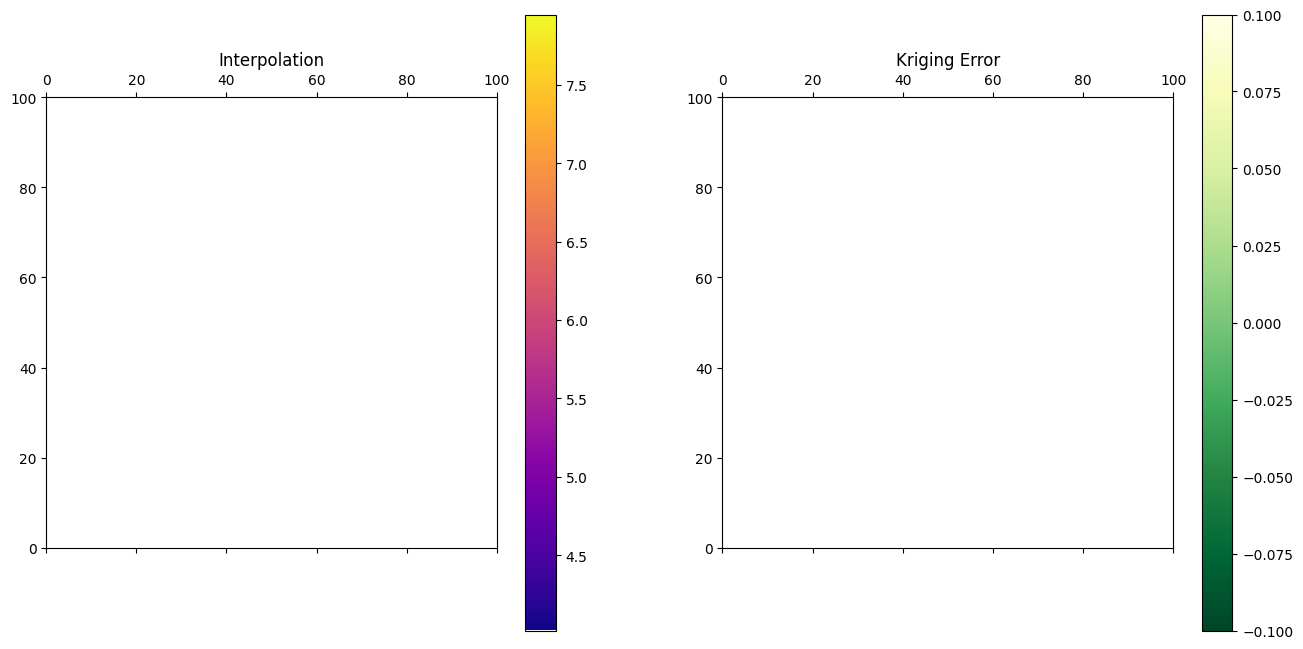

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# rescale the coordinates to fit the interpolation raster
x_ = (x - x.min()) / (x.max() - x.min()) * 100
y_ = (y - y.min()) / (y.max() - y.min()) * 100

art = axes[0].matshow(field.T, origin='lower', cmap='plasma', vmin=vals.min(), vmax=vals.max())
axes[0].set_title('Interpolation')
axes[0].plot(x_, y_, '+w')
axes[0].set_xlim((0, 100))
axes[0].set_ylim((0, 100))
plt.colorbar(art, ax=axes[0])
art = axes[1].matshow(s2.T, origin='lower', cmap='YlGn_r')
axes[1].set_title('Kriging Error')
plt.colorbar(art, ax=axes[1])
axes[1].plot(x_, y_, '+w')
axes[1].set_xlim((0, 100))
axes[1].set_ylim((0, 100))

plt.show()